# Interview Prep: DS Sprint Challenge

### _Tobias Reaper_

> Attempt one or both of the following challenges

* [Challenge A](#Challenge-A)
* [Challenge B](#Challenge-B)

---

## Challenge A

A major online travel booking company provides this [two column dataset](https://drive.google.com/file/d/0B7ljSqzqjOkEMEFXdlY1WXN6WUk/view) to candidates for its Data Science positions. This company calls this dataset a puzzle. Spend some time investigating this dataset and 'solving' the puzzle.

In [21]:
# === Imports === #
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 200

In [13]:
# === Load the dataset === #
df_puzzle = pd.read_csv("puzzle.csv", header=None)
print(df_puzzle.shape)
df_puzzle.head()

(1024, 2)


,0,1
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


In [5]:
# === Take a look at some basic stats === #
df_puzzle.describe()

,0,1
count,1024.000000,1024.000000
mean,0.504729,-0.388165
std,0.355107,1.499346
min,-0.925070,-2.837888
25%,0.389721,-1.559228
50%,0.591392,-1.129903
75%,0.746583,0.578621
max,1.195399,3.096964


Nothing looks particularly unique or noteworthy from these numbers, except maybe the fact that the number of observations is a power of 2.

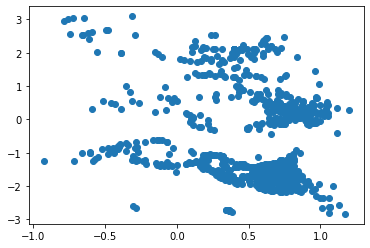

In [11]:
# === Basic plotting === #
plt.scatter(df_puzzle[0], df_puzzle[1]);

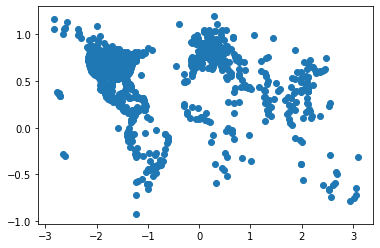

In [10]:
plt.scatter(df_puzzle[1], df_puzzle[0]);

> The shape of the data points on the second scatterplot looks vaguely like the Earth's land masses.

Based on the second plot, which puts 1 on the x-axis and 0 on the y-axis, the data looks a bit like it could be some sort of map or global positioning data.

This would make sense, given that the data is from an online booking company.

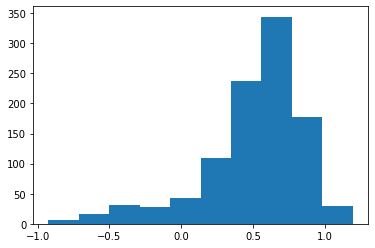

In [27]:
# === Frequency distributions === #
plt.hist(df_puzzle[0]);

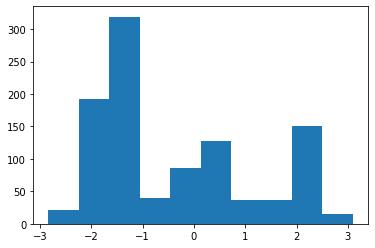

In [28]:
plt.hist(df_puzzle[1]);

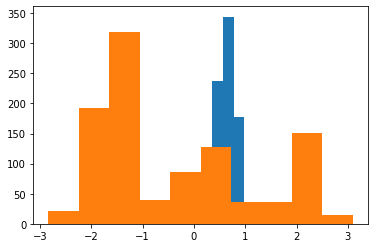

In [29]:
plt.hist(df_puzzle[0]);
plt.hist(df_puzzle[1]);

In [58]:
df_puzzle.head(32)

,0,1
0,0.397150,2.113629
1,0.397150,2.113629
2,0.397150,2.113629
3,0.397150,2.113629
4,0.397150,2.113629
5,0.397150,2.113629
6,0.397150,2.113629
7,0.397150,2.113629
8,0.967562,-0.099246
9,0.061841,-1.333110


There seems to be many more occurrences of 0.397159 in the 0 column and 2.1136929 in the 1 column.

In [25]:
# === Count values in column 0 === #
# That value seems to be noteworthy - 101 occurrences vs max of 2 for any other number
df_puzzle[0].value_counts()

 0.397150    101
 1.067695      2
-0.065909      2
-0.388084      2
 0.719915      2
            ... 
 1.195399      1
 0.189072      1
-0.315090      1
-0.399864      1
 0.720770      1
Name: 0, Length: 912, dtype: int64

In [30]:
# === Count values in column 1 === #
# The other mentioned value also seems to be noteworthy
df_puzzle[1].value_counts()

 2.113629    101
-0.151519      2
-0.672521      2
 0.408607      2
 0.047801      2
            ... 
-1.426130      1
-1.739777      1
-1.529086      1
 0.294713      1
-1.394802      1
Name: 1, Length: 912, dtype: int64

The numbers mentioned are definitely a clue.

Every value for each column except 1 has a max frequency of 2, then they both have one value that occurs 101 times. That doesn't seem to be a chance happening.

Some thoughts about what to explore around those two values:

* Look for them being same / different row
* Plot only those values, color them differently and overlay onto main plot

In [42]:
df_puzzle.head(8)

,0,1
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629
5,0.39715,2.113629
6,0.39715,2.113629
7,0.39715,2.113629


Just based on eyeballing it, it seems that the two values are always in the same row.

This would seem to indicate that this is some sort of travel destination or airport.

In [46]:
df_puzzle.iloc[0]

0    0.397150
1    2.113629
Name: 0, dtype: float64

In [52]:
# === Filter dataset based on values === #
value_only = df_puzzle[(df_puzzle[1] >= 2.1136) & (df_puzzle[1] < 2.114)]
print(value_only.shape)
value_only.head()

(101, 2)


,0,1
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


Confirmed: every occurrence of each value is on the same row as that of the other column's noteworthy value.

Then the question becomes...

> Why are there 101 of the exact same data points while there is a maximum of 2 of any other point?

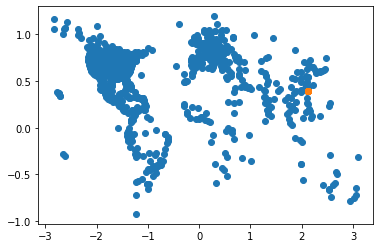

In [57]:
# Plot the points, though it will only show up as a single point
# Overlay those points onto the full dataset scatter
plt.scatter(df_puzzle[1], df_puzzle[0]);
plt.scatter(value_only[1], value_only[0]);

This seems to indicate that there is something noteworthy at that location.

If the points do indeed show some sort of location data, which would make sense, given that the company is an online travel booking company, that point would likely be somewhere along the coast of China.

In [ ]:
# === Zoom in on that part of the plot === #

---

## Challenge B

Attempt a score of 0.4 or better on the [Bosch production line performance](https://www.kaggle.com/c/bosch-production-line-performance/overview) Kaggle challenge.